![Iris](iris.jpg)

## O Danych

Zbiór danych zawiera informacje o trzech gatunkach irysów: Iris setosa, Iris versicolor i Iris virginica.

Dane obejmują pomiary czterech cech: długość i szerokość działki kielicha oraz długość i szerokość płatka.

Każdy wiersz w zbiorze danych reprezentuje pojedynczy kwiat, a wartości pomiarów są podane w centymetrach.

Zbiór składa się z 150 próbek, po 50 dla każdego gatunku, i jest szeroko stosowany jako podstawowy zbiór danych do
testowania algorytmów klasyfikacji oraz w nauce o danych i uczeniu maszynowym.

Kolumny:
* **długość kielicha (sepal length)** - Długość kielicha w cm
* **szerokość kielicha (sepal width)** - Szerokość kielicha w cm
* **długość płatka (petal length)** - Długość płatka w cm
* **szerokość płatka (petal width)** - Szerokość płatka w cm
* **klasa (class)** - Klasa irysa (setosa, versicolor, virginica)

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv('25__iris.csv', sep=",")
df

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width),klasa (class)
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## 1. ZROZUMIENIE DANYCH:

#### OTO 15 PRZYKŁADOWYCH REKORDÓW:

In [7]:
random_sample = df.sample(15)
random_sample

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width),klasa (class)
88,5.6,3.0,4.1,1.3,Iris-versicolor
94,5.6,2.7,4.2,1.3,Iris-versicolor
10,5.4,3.7,1.5,0.2,Iris-setosa
93,5.0,2.3,3.3,1.0,Iris-versicolor
41,4.5,2.3,1.3,0.3,Iris-setosa
116,6.5,3.0,5.5,1.8,Iris-virginica
46,5.1,3.8,1.6,0.2,Iris-setosa
29,4.7,3.2,1.6,0.2,Iris-setosa
147,6.5,3.0,5.2,2.0,Iris-virginica
123,6.3,2.7,4.9,1.8,Iris-virginica


In [ ]:
# random_sample[random_sample['klasa (class)'] == 'Iris-virginica']

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width),klasa (class)
116,6.5,3.0,5.5,1.8,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
123,6.3,2.7,4.9,1.8,Iris-virginica
125,7.2,3.2,6.0,1.8,Iris-virginica
139,6.9,3.1,5.4,2.1,Iris-virginica


#### OBSERWACJE:
Na pierwszy rzut oka na próbkę danych możemy zaobserwować kilka rzeczy:
* gatunek "setosa" ma długość kielicha około 4-6cm, szerokość kielicha około 2-4cm, długość płatka 1-2cm, szerokość płatka 0-1cm
* gatunek "versicolor" ma długość kielicha około 5-7cm, szerokość kielicha około 2-4cm, długość płatka 3-4cm, szerokość płatka 1-2cm
* gatunek "virginica" ma długość kielicha około 6-8cm, szerokość kielicha około 2-4cm, długość płatka 4-6cm, szerokość płatka 1-3cm

#### PODSTAWOWE STATYSTYKI DLA GATUNKU SETOSA:

In [16]:
iris_setosa_df = df[df['klasa (class)'] == 'Iris-setosa']
iris_setosa_df.describe()

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width)
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


#### OBSERWACJE:
Dokładniejsza analiza danych potwierdza wcześniejszą wstępną obserwację gatunku "Setosa":
* długość kielicha zawiera się w przedziale 4,3 - 5,8 cm, a większość wartości znajduje się między około 4,65 - 5,35 cm
* szerokość kielicha zawiera się w przedziale 2,3 - 4,4 cm, a większość wartości znajduje się między około 3,03 - 3,79 cm
* długość płatka zawiera się w przedziale 1,0 - 1,9 cm, a większość wartości znajduje się między około 1,29 - 1,63 cm
* szerokość płatka zawiera się w przedziale 0,1 - 0,6 cm, a większość wartości znajduje się między około 0,14 - 0,34 cm 

#### PODSTAWOWE STATYSTYKI DLA GATUNKU VERSICOLOR:

In [17]:
iris_versicolor_df = df[df['klasa (class)'] == 'Iris-versicolor']
iris_versicolor_df.describe()

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width)
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


#### OBSERWACJE:
Dokładniejsza analiza danych potwierdza wcześniejszą wstępną obserwację gatunku "Versicolor":
* długość kielicha zawiera się w przedziale 4,9 - 7,0 cm, a większość wartości znajduje się między około 5,42 - 6,44 cm
* szerokość kielicha zawiera się w przedziale 2,0 - 3,4 cm, a większość wartości znajduje się między około 2,46 - 3,08 cm
* długość płatka zawiera się w przedziale 3,0 - 5,1 cm, a większość wartości znajduje się między około 3,79 - 4,73 cm
* szerokość płatka zawiera się w przedziale 1,0 - 1,8 cm, a większość wartości znajduje się między około 1,12 - 1,52 cm 

#### PODSTAWOWE STATYSTYKI DLA GATUNKU VIRGINICA:

In [19]:
iris_virginica_df = df[df['klasa (class)'] == 'Iris-virginica']
iris_virginica_df.describe()

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width)
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


#### OBSERWACJE:
Dokładniejsza analiza danych potwierdza wcześniejszą wstępną obserwację gatunku "Virginica":
* długość kielicha zawiera się w przedziale 4,9 - 7,9 cm, a większość wartości znajduje się między około 5,95 - 7,23 cm
* szerokość kielicha zawiera się w przedziale 2,2 - 3,8 cm, a większość wartości znajduje się między około 2,68 - 3,32 cm
* długość płatka zawiera się w przedziale 4,5 - 6,9 cm, a większość wartości znajduje się między około 5,00 - 6,10 cm
* szerokość płatka zawiera się w przedziale 1,4 - 2,5 cm, a większość wartości znajduje się między około 1,75 - 2,30 cm 

## 2. BRAKUJĄCE WARTOŚCI:

In [23]:
df.isnull().sum()

długość kielicha (sepal length)     0
szerokość kielicha (sepal width)    0
długość płatka (petal length)       0
szerokość płatka (petal width)      0
klasa (class)                       0
dtype: int64

#### OBSERWACJE:
W zbiorze nie ma brakujących wartości

## 3. EKSPLORACJA POSZCZEGÓLNYCH KOLUMN:

In [ ]:
df_setosa = df[df['klasa (class)'] == 'Iris-setosa']

df_versicolor = df[df['klasa (class)'] == 'Iris-versicolor']

df_virginica = df[df['klasa (class)'] == 'Iris-virginica']

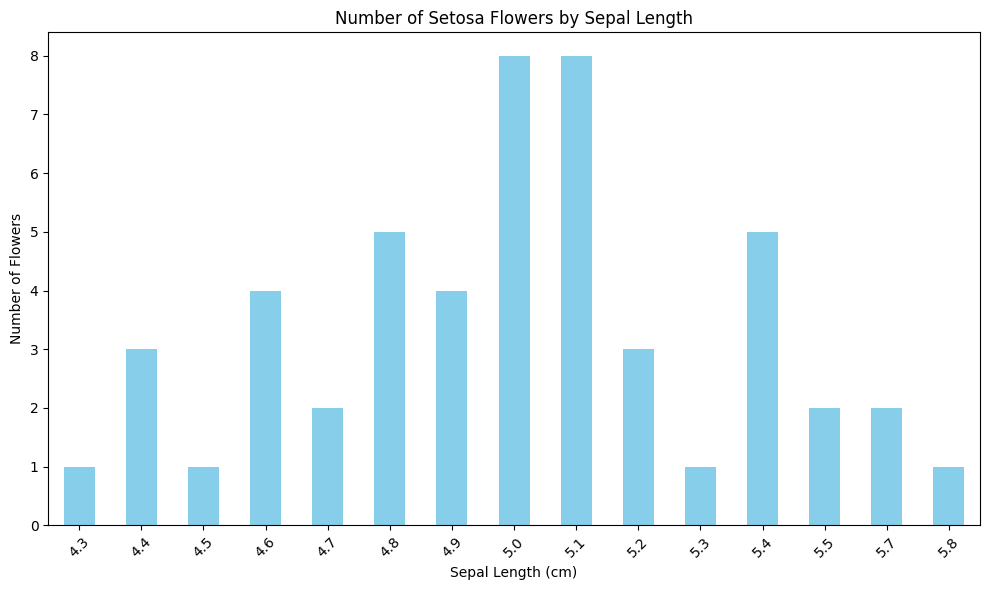

In [ ]:
sepal_length_counts = df_setosa['długość kielicha (sepal length)'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sepal_length_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Setosa Flowers by Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Number of Flowers')
plt.xticks(rotation=45)
plt.tight_layout()

#### OBSERWACJE - "Setosa" długość kielicha:
Widać, że liczba kwiatów z gatunku "Setosa" rośnie dla długości kielicha od 4,3cm do 5,0-5,1cm, a następnie ta liczba maleje.

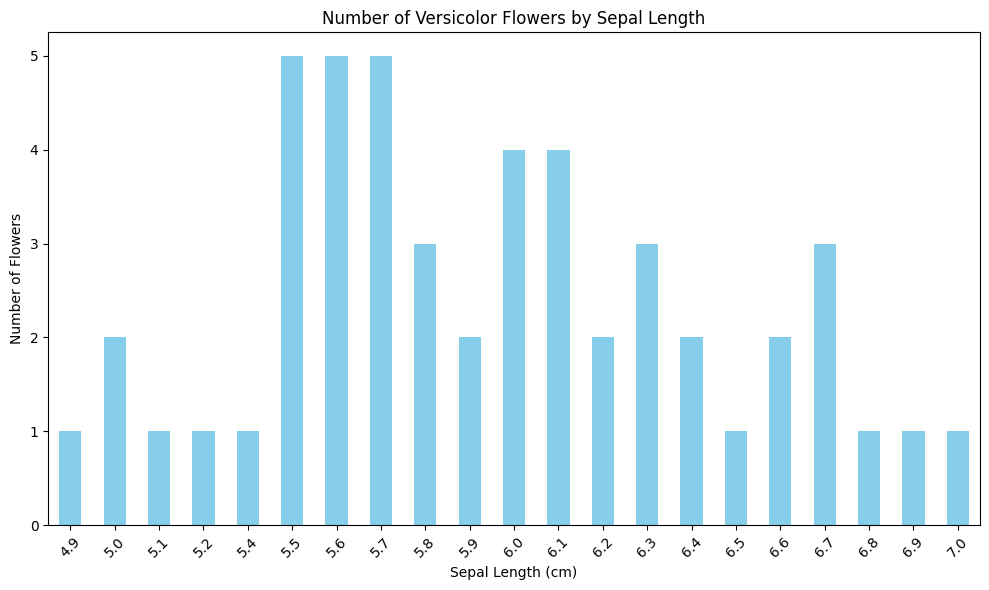

In [ ]:
sepal_length_counts = df_versicolor['długość kielicha (sepal length)'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sepal_length_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Versicolor Flowers by Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Number of Flowers')
plt.xticks(rotation=45)
plt.tight_layout()

#### OBSERWACJE - "Versicolor" długość kielicha:
Widać, że liczba kwiatów z gatunku "Versicolor" rośnie dla długości kielicha od 4,9cm do 5,5-5,7cm, a następnie ta liczba stopniowo maleje.

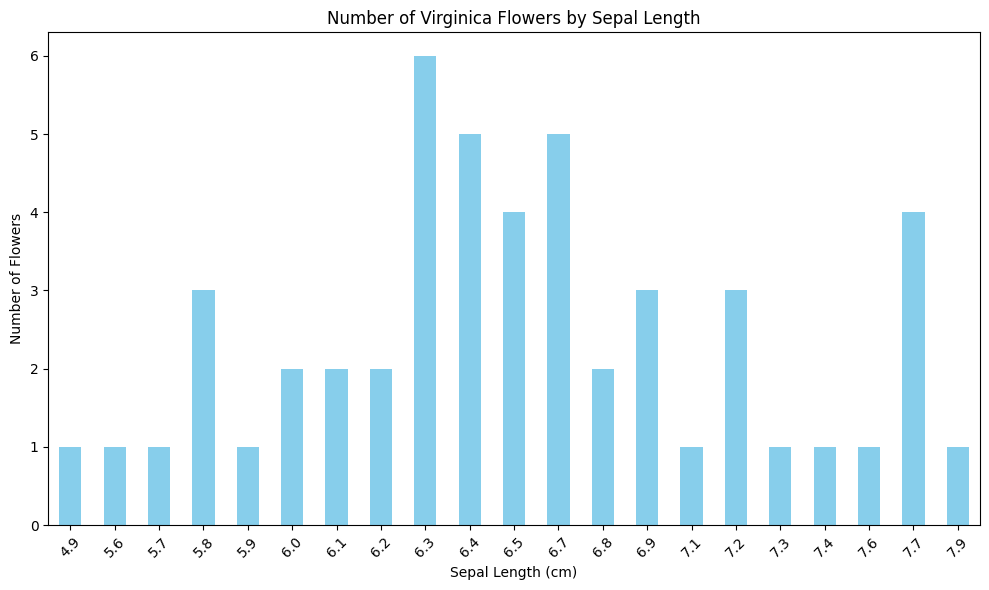

In [ ]:
df_virginica = df[df['klasa (class)'] == 'Iris-virginica']

sepal_length_counts = df_virginica['długość kielicha (sepal length)'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sepal_length_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Virginica Flowers by Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Number of Flowers')
plt.xticks(rotation=45)
plt.tight_layout()

#### OBSERWACJE - "Virginica" długość kielicha:
Widać, że liczba kwiatów z gatunku "Virginica" rośnie dla długości kielicha od 4,9cm do 6,3cm, a następnie ta liczba maleje. Wyjątek stanowi liczba kwiatów mająca długość kielicha 7,7cm, gdzie tych kwiatów jest z powrotem więcej.

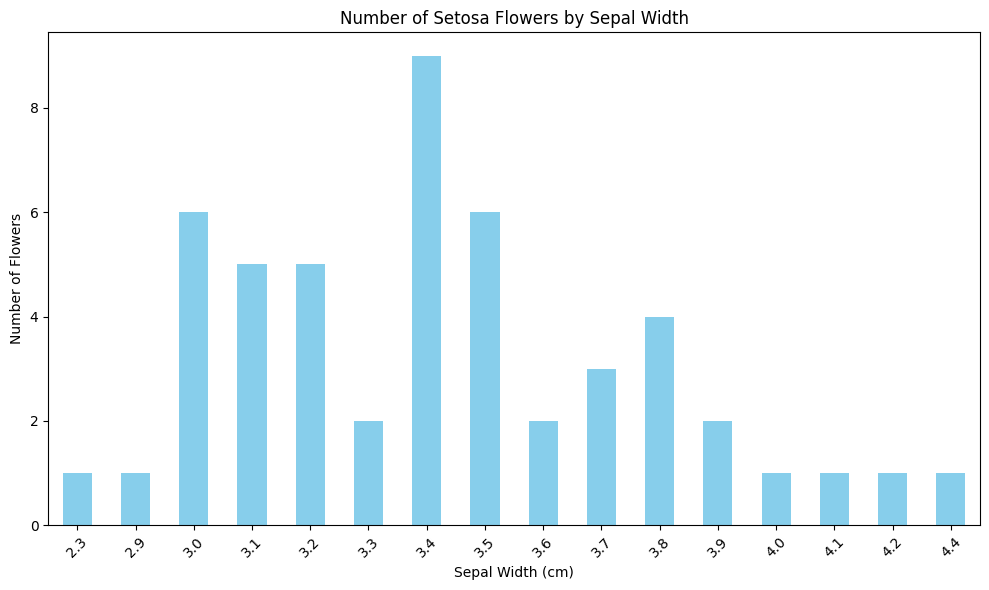

In [ ]:
sepal_width_counts = df_setosa['szerokość kielicha (sepal width)'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sepal_width_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Setosa Flowers by Sepal Width')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Number of Flowers')
plt.xticks(rotation=45)
plt.tight_layout()

#### OBSERWACJE - "Setosa" szerokość kielicha:
Widać ogólną tendecję wzrostową dla liczby kwiatów gatunku "Setosa" w zależności od szerokości kielicha od 2,3 cm do 3,4 cm. Następnie aż do szerokości 4,4 cm tendencja jest malejąca.

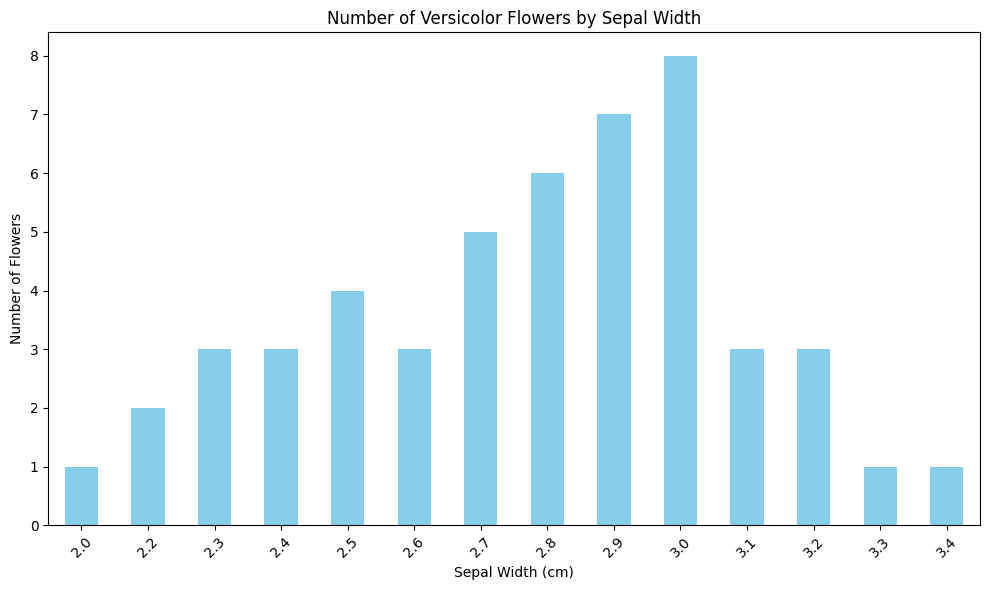

In [ ]:
sepal_width_counts = df_versicolor['szerokość kielicha (sepal width)'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sepal_width_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Versicolor Flowers by Sepal Width')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Number of Flowers')
plt.xticks(rotation=45)
plt.tight_layout()

#### OBSERWACJE - "Versicolor" szerokość kielicha:
Widać zdecydowaną tendecję wzrostową dla liczby kwiatów gatunku "Versicolor" w zależności od szerokości kielicha od 2,0 cm do 3,0 cm. Następnie aż do szerokości 3,4 cm tendencja jest malejąca.

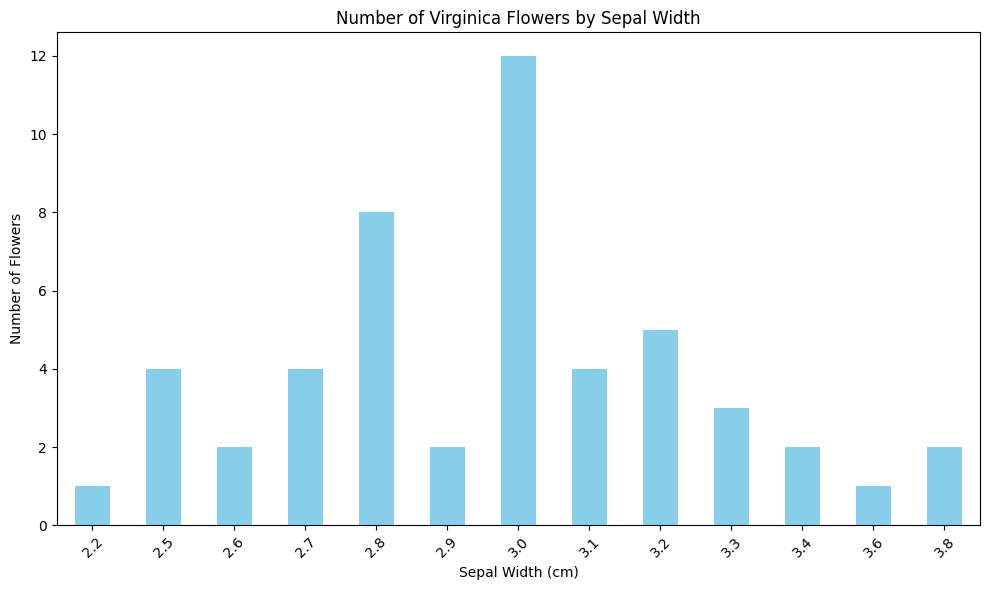

In [ ]:
sepal_width_counts = df_virginica['szerokość kielicha (sepal width)'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sepal_width_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Virginica Flowers by Sepal Width')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Number of Flowers')
plt.xticks(rotation=45)
plt.tight_layout()

#### OBSERWACJE - "Virginica" szerokość kielicha:
Widać ogólną tendecję wzrostową dla liczby kwiatów gatunku "Virginica" w zależności od szerokości kielicha od 2,2 cm do 3,0 cm. Następnie aż do szerokości 3,8 cm tendencja jest malejąca.

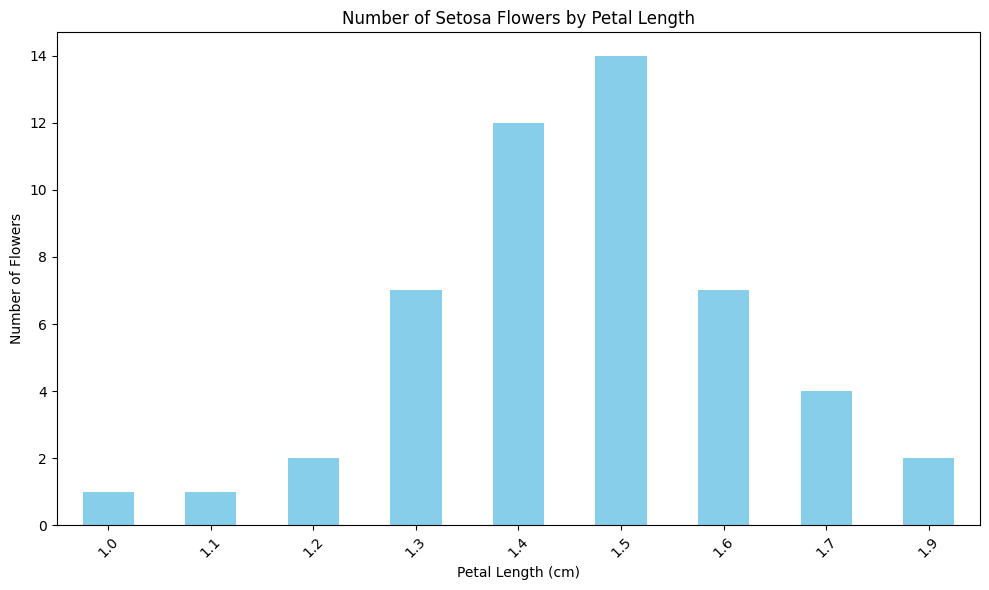

In [ ]:
petal_length_counts = df_setosa['długość płatka (petal length)'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
petal_length_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Setosa Flowers by Petal Length')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Number of Flowers')
plt.xticks(rotation=45)
plt.tight_layout()

##### OBSERWACJE - "Setosa" długość płatka:
Widać tendencję wzrostową liczby kwiatów gatunku "Setosa" wraz ze wzrostem długości płatka, aż do 1,5 cm. Następnie tendencję malejącą. 

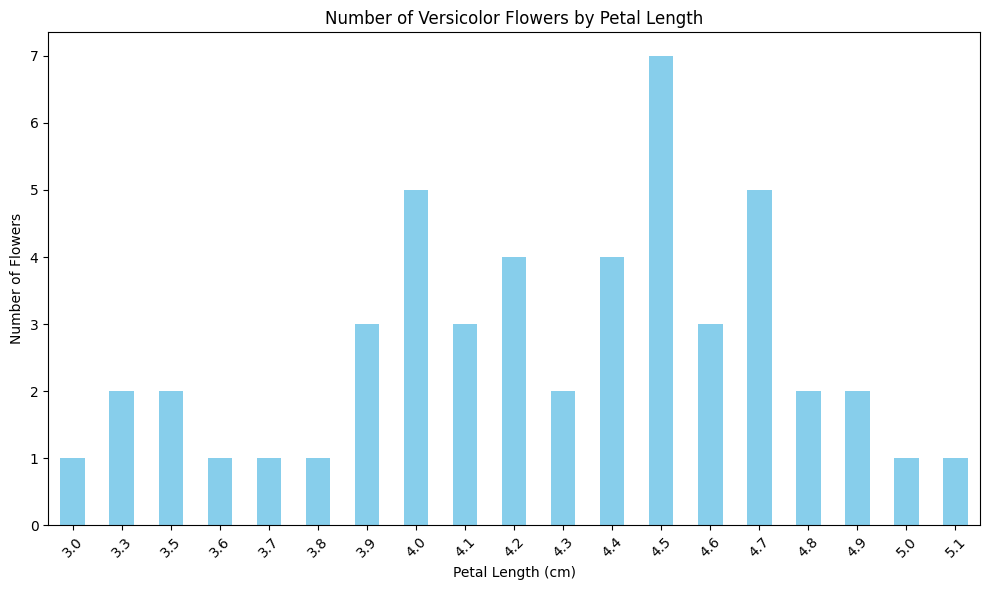

In [ ]:
petal_length_counts = df_versicolor['długość płatka (petal length)'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
petal_length_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Versicolor Flowers by Petal Length')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Number of Flowers')
plt.xticks(rotation=45)
plt.tight_layout()

#### OBSERWACJE - "Versicolor" długość płatka:
Widać ogólną tendencję wzrostową liczby kwiatów gatunku "Versicolor" wraz ze wzrostem długości płatka, aż do 4,5 cm. Następnie widać ogólną tendencję malejącą. 

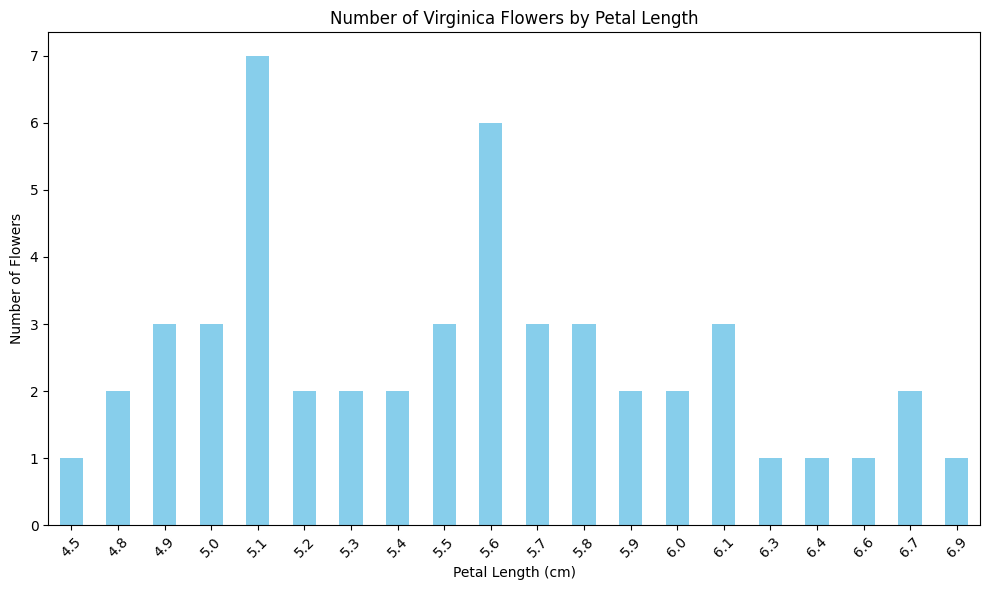

In [ ]:
petal_length_counts = df_virginica['długość płatka (petal length)'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
petal_length_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Virginica Flowers by Petal Length')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Number of Flowers')
plt.xticks(rotation=45)
plt.tight_layout()

#### OBSERWACJE - "Virginica" długość płatka:
Widać tendencję wzrostową liczby kwiatów gatunku "Virginica" wraz ze wzrostem długości płatka, między 4,5 cm, a 4,9 cm. Następnie między 4,9 cm i 6,1 cm widać podobną liczbę kwiatów dla różnych długości płatka z wyjątkiem dwóch pików w 5,1 cm oraz 5,6 cm. Następnie po 6,1 cm widać również mniejszą liczbę kwiatów. 

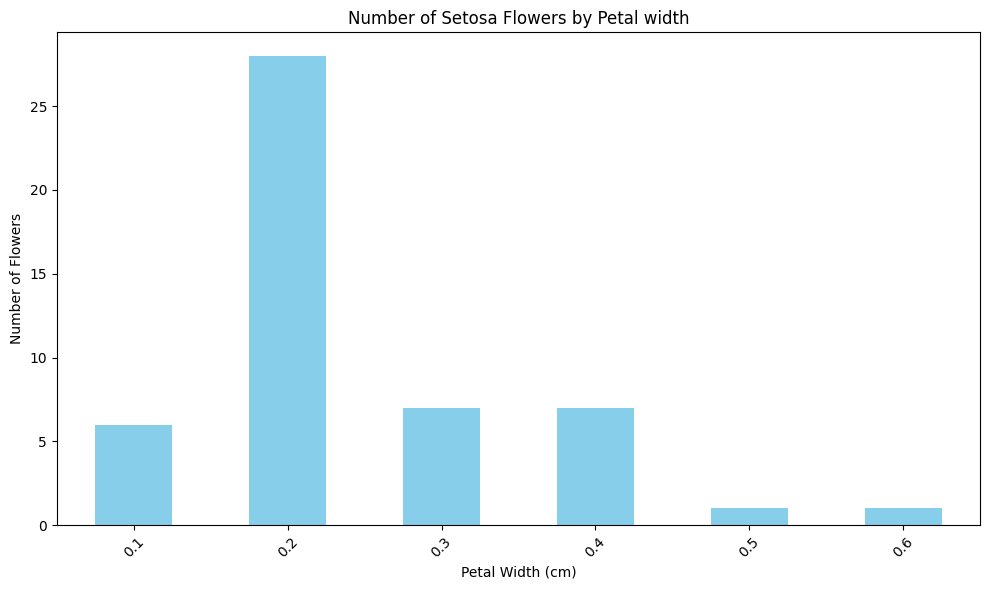

In [ ]:
petal_width_counts = df_setosa['szerokość płatka (petal width)'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
petal_width_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Setosa Flowers by Petal width')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Number of Flowers')
plt.xticks(rotation=45)
plt.tight_layout()

#### OBSERWACJE - "Setosa" szerokość płatka:
Widać, że w ponad połowie przypadków szerokość płatka w gatunku "Setosa" wynosi 0,2 cm. Liczba kwiatów rośnie do tej długości, a następnie maleje.

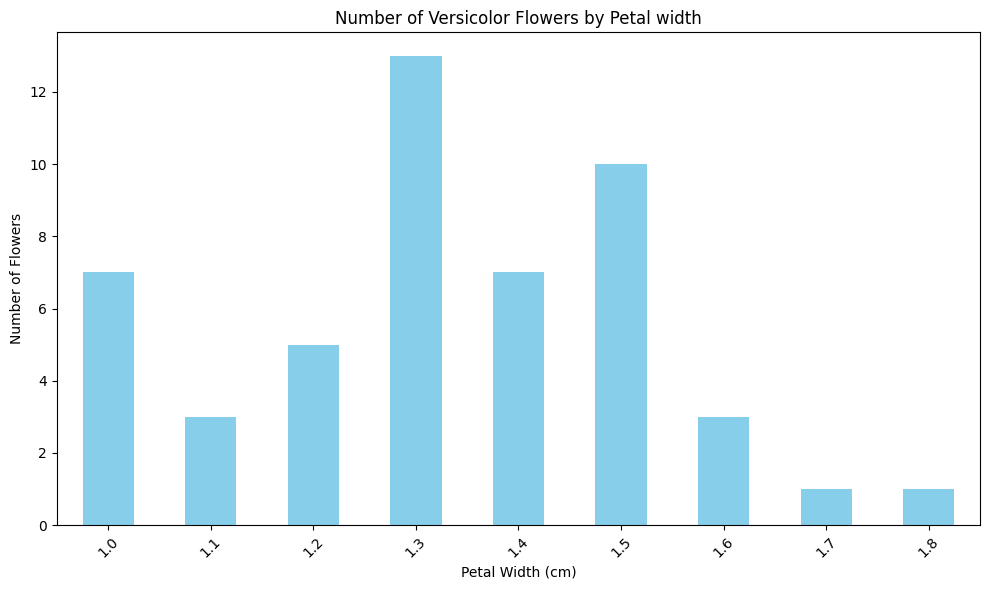

In [ ]:
petal_width_counts = df_versicolor['szerokość płatka (petal width)'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
petal_width_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Versicolor Flowers by Petal width')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Number of Flowers')
plt.xticks(rotation=45)
plt.tight_layout()

#### OBSERWACJE - "Versicolor" szerokość płatka:
Widać ogólną tendencję wzrostową liczby kwiatów gatunku "Versicolor" do 1,3 cm, a następnie ogólną tendencję malejącą.

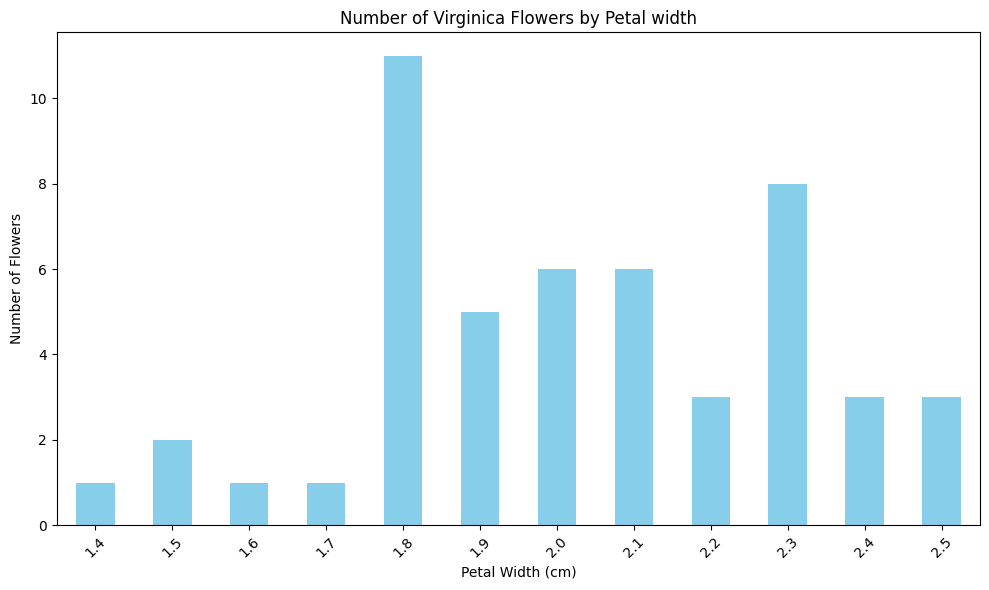

In [ ]:
petal_width_counts = df_virginica['szerokość płatka (petal width)'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
petal_width_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Virginica Flowers by Petal width')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Number of Flowers')
plt.xticks(rotation=45)
plt.tight_layout()

#### OBSERWACJE - "Virginica" szerokość płatka:
Widać małą liczbę kwiatów z szerokością płatka poniżej 1,8 cm. W 1,8 cm następuje pik, a następnie liczba kwiatów spada i utrzymuje sie na stałym poziomie aż do 2,5 cm.

## 5. ANALIZA RELACJI MIĘDZY KOLUMNAMI:

* SETOSA

C:\Users\user\AppData\Local\Temp\ipykernel_16816\2902643722.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_setosa.corr()


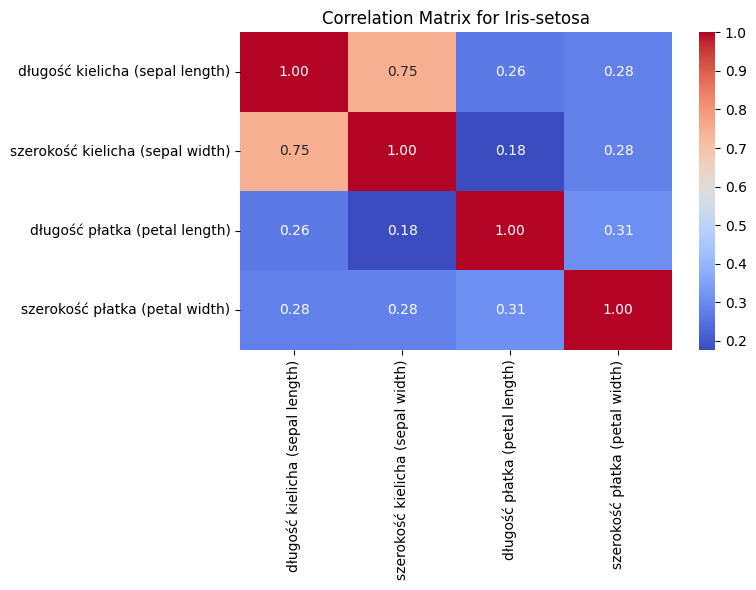

In [ ]:
correlation_matrix = df_setosa.select_dtypes(include=['number']).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Iris-setosa')
plt.tight_layout()

#### OBSERWACJE:
Na macierzy korelacji dla gatunku "Setosa" możemy dostrzec korelację długości kielicha z szerokością kielicha. Możemy narysować scatter plot, żeby wyraźniej to zobaczyć.

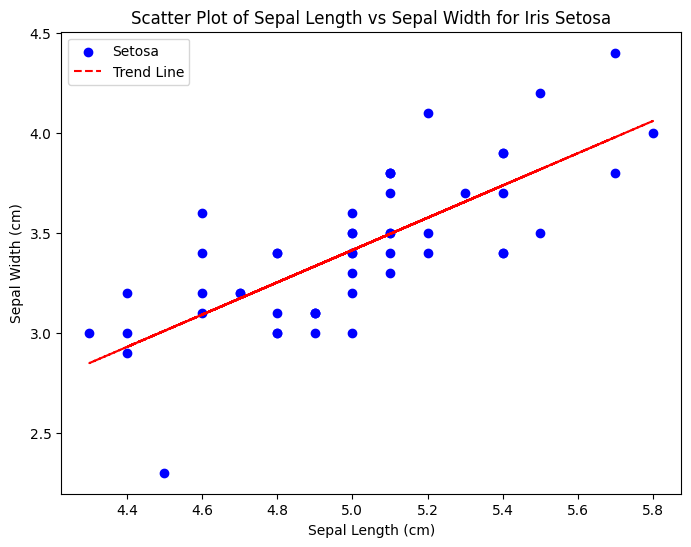

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df_setosa['długość kielicha (sepal length)'], df_setosa['szerokość kielicha (sepal width)'], color='blue', label='Setosa')

z = np.polyfit(df_setosa['długość kielicha (sepal length)'], df_setosa['szerokość kielicha (sepal width)'], 1)
p = np.poly1d(z)
plt.plot(df_setosa['długość kielicha (sepal length)'], p(df_setosa['długość kielicha (sepal length)']), color='red', linestyle='--', label='Trend Line')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Scatter Plot of Sepal Length vs Sepal Width for Iris Setosa')
plt.legend()

* VERSICOLOR

C:\Users\user\AppData\Local\Temp\ipykernel_16816\3919186899.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_versicolor.corr()


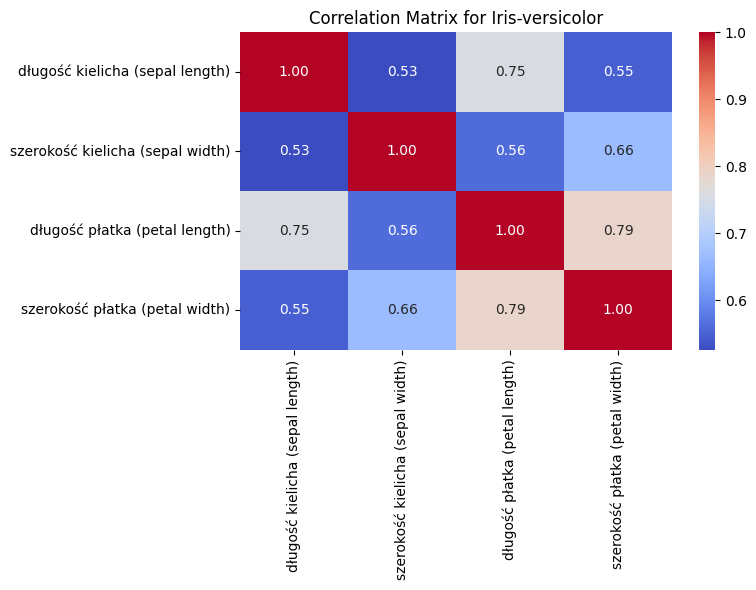

In [ ]:
correlation_matrix = df_versicolor.select_dtypes(include=['number']).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Iris-versicolor')
plt.tight_layout()

#### OBSERWACJE:
Widzimy tu najbardziej wyraźne korelacje pomiędzy długością kielicha, a długością płatka, a także pomiędzy długością i szerokością płatka. Również możemy sobie narysować scatter ploty, aby to zobaczyć.

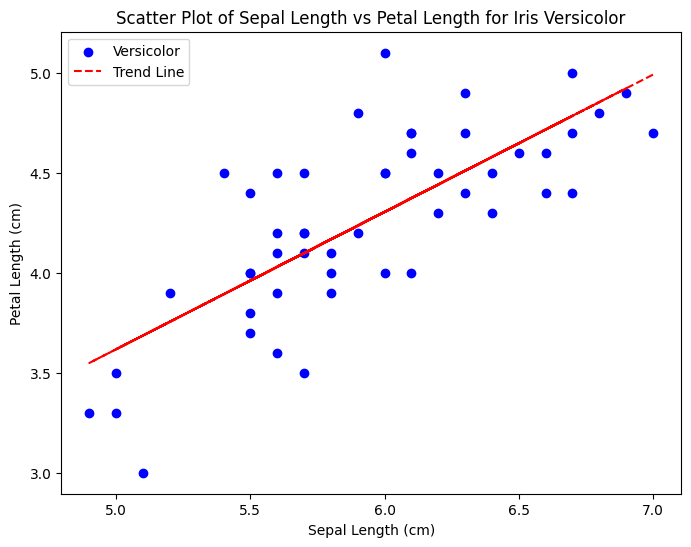

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df_versicolor['długość kielicha (sepal length)'], df_versicolor['długość płatka (petal length)'], color='blue', label='Versicolor')

z = np.polyfit(df_versicolor['długość kielicha (sepal length)'], df_versicolor['długość płatka (petal length)'], 1)
p = np.poly1d(z)
plt.plot(df_versicolor['długość kielicha (sepal length)'], p(df_versicolor['długość kielicha (sepal length)']), color='red', linestyle='--', label='Trend Line')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Scatter Plot of Sepal Length vs Petal Length for Iris Versicolor')
plt.legend()

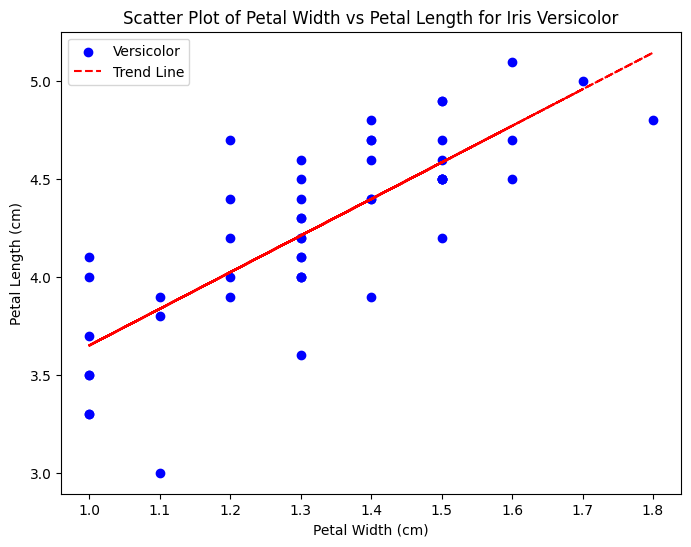

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df_versicolor['szerokość płatka (petal width)'], df_versicolor['długość płatka (petal length)'], color='blue', label='Versicolor')

z = np.polyfit(df_versicolor['szerokość płatka (petal width)'], df_versicolor['długość płatka (petal length)'], 1)
p = np.poly1d(z)
plt.plot(df_versicolor['szerokość płatka (petal width)'], p(df_versicolor['szerokość płatka (petal width)']), color='red', linestyle='--', label='Trend Line')

plt.xlabel('Petal Width (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Scatter Plot of Petal Width vs Petal Length for Iris Versicolor')
plt.legend()

* VIRGINICA

C:\Users\user\AppData\Local\Temp\ipykernel_16816\824969096.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_virginica.corr()


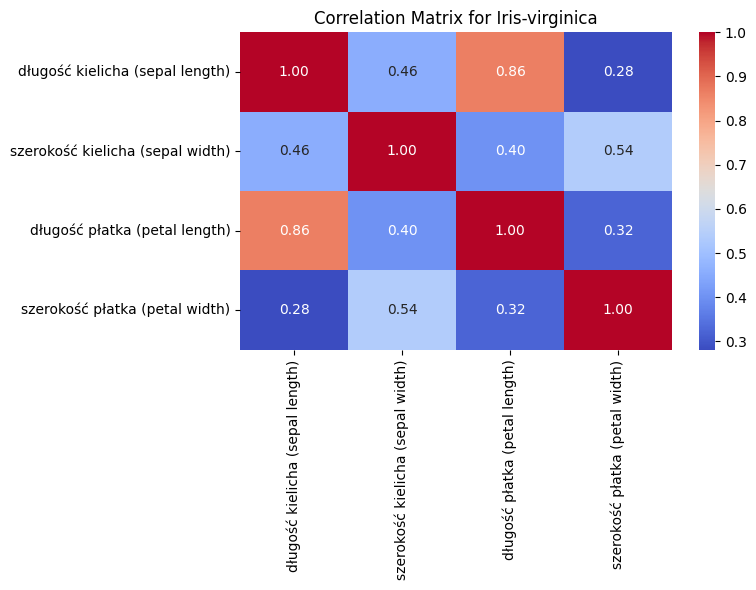

In [ ]:
correlation_matrix = df_virginica.select_dtypes(include=['number']).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Iris-virginica')
plt.tight_layout()

#### OBSERWACJE:
Na wykresie widzimy silną korelację długości kielicha z długością płatka, co zobrazujemy na poniższym wykresie:

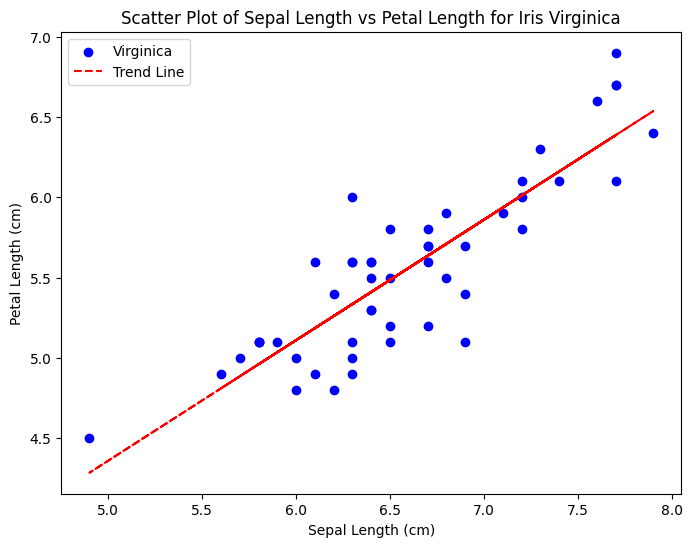

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df_virginica['długość kielicha (sepal length)'], df_virginica['długość płatka (petal length)'], color='blue', label='Virginica')

z = np.polyfit(df_virginica['długość kielicha (sepal length)'], df_virginica['długość płatka (petal length)'], 1)
p = np.poly1d(z)
plt.plot(df_virginica['długość kielicha (sepal length)'], p(df_virginica['długość kielicha (sepal length)']), color='red', linestyle='--', label='Trend Line')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Scatter Plot of Sepal Length vs Petal Length for Iris Virginica')
plt.legend()

## 6. WARTOŚCI ODSTAJĄCE:

* SETOSA

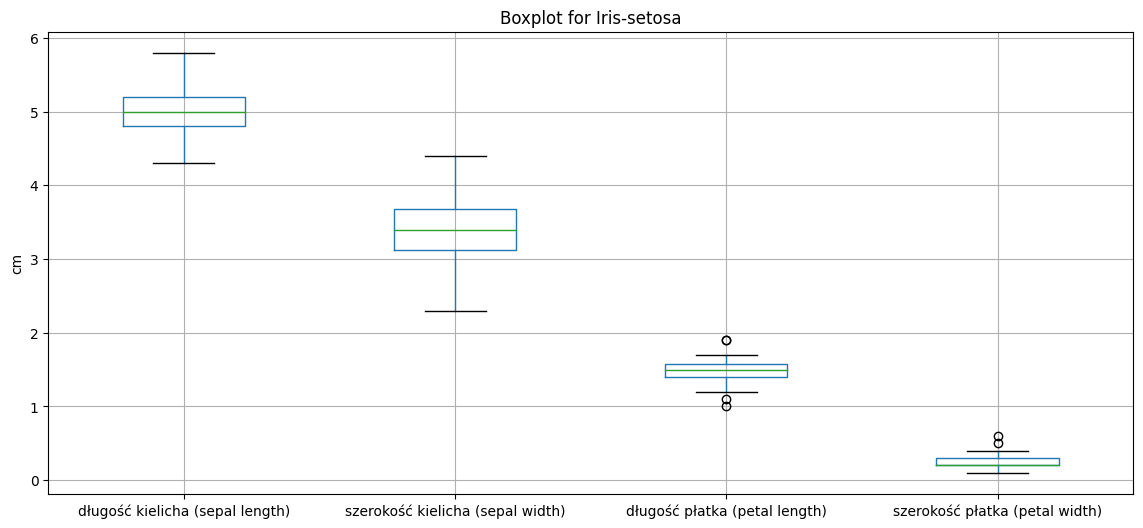

In [ ]:
plt.figure(figsize=(14, 6))
df_setosa.boxplot(column=['długość kielicha (sepal length)', 'szerokość kielicha (sepal width)', 'długość płatka (petal length)', 'szerokość płatka (petal width)'])
plt.title('Boxplot for Iris-setosa')
plt.ylabel('cm')

* VERSICOLOR

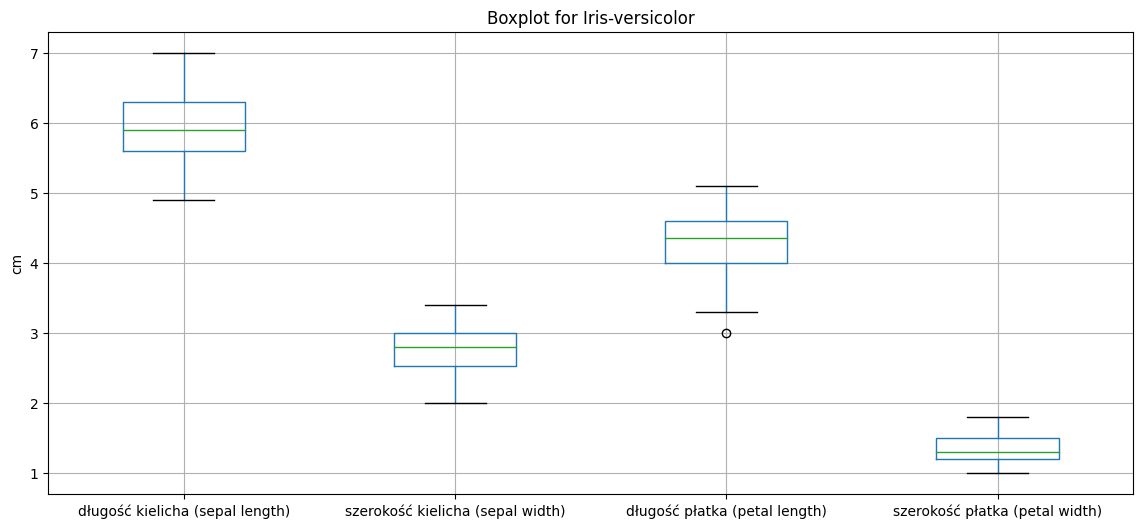

In [ ]:
plt.figure(figsize=(14, 6))
df_versicolor.boxplot(column=['długość kielicha (sepal length)', 'szerokość kielicha (sepal width)', 'długość płatka (petal length)', 'szerokość płatka (petal width)'])
plt.title('Boxplot for Iris-versicolor')
plt.ylabel('cm')

* VIRGINICA

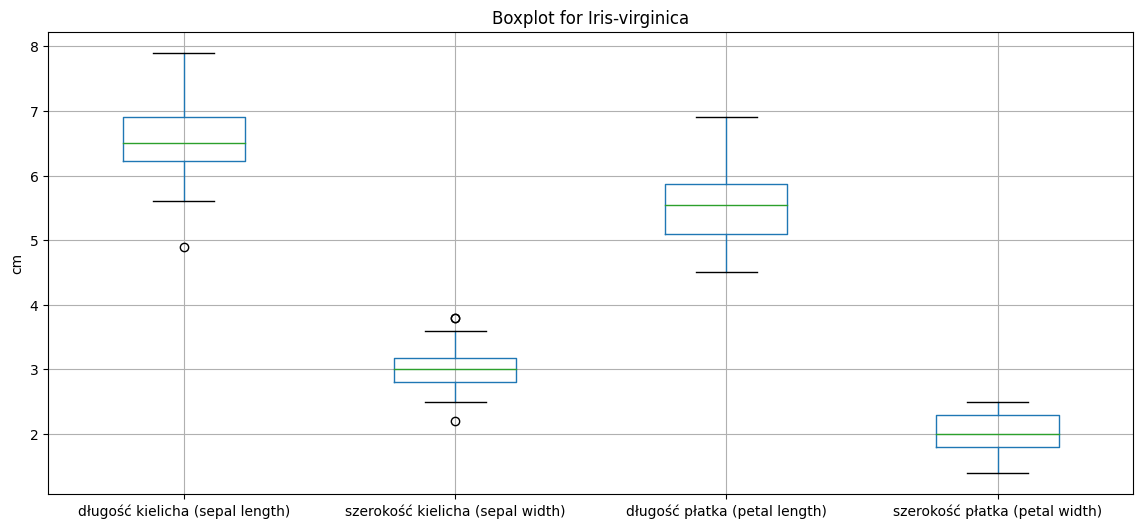

In [ ]:
plt.figure(figsize=(14, 6))
df_virginica.boxplot(column=['długość kielicha (sepal length)', 'szerokość kielicha (sepal width)', 'długość płatka (petal length)', 'szerokość płatka (petal width)'])
plt.title('Boxplot for Iris-virginica')
plt.ylabel('cm')

#### OBSERWACJE:
Widzimy, że jest zaledwie kilka wartości odstających we wszystkich kolumnach.

## WNIOSKI:
Już na pierwszy rzut oka widać, że gatunek "Setosa" ma zdecydowanie najmniejsze płatki (zarówno długość, jak i szerokość). Wartości te nawet nie nakładają się z wartościami pozostałych gatunków, więc po tym można łatwo rozpoznać rodzaj "Setosa". Dodatkowo posiada on korelację pomiędzy długością i szerokścią kielicha, dzięki czemu posiadając jeden z tych wymiarów jesteśmy w stanie przewidzieć wartość drugiego. Długość kielicha również jest najmniejsza z gatunków, natomiast szerokość kielicha największa, jednak nie są to już tak wyraźne różnice jak w przypadku wymiarów płatka.

Gatunek "Versicolor" ma nieznacznie dłuższy oraz mniej szeroki kielich od "Setosy" oraz ogólnie nieznacznie mniejszy kielich od gatunku "Virginica". Wymiary jego płatków są zdecydowanie większe od "Setosy", a widocznie mniejsze od gatunku "Virginica". Posiada również korelacje pomiędzy długością płatka i długością kielicha oraz długością i szerokością płatka.

Gatunek "Virginica" ma najdłuższy kielich oraz największe płatki. Tak jak "Versicolor" również wartości długości kielicha oraz długości płatka są ze sobą skorelowane. 


## PODSUMOWANIE:
Gatunek "Setosa" poznamy po krótkim i szerokim kielichu oraz małych płatkach, które będą go wyróżniały od pozostałych gatunków. "Versicolor" będzie miał dłuższy i trochę węższy kielich ze zdecydowanie większymi płatkami. Natomiast "Virginica" będzie miała najdłuższy kielich i największe płatki.  